In [124]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [126]:
df = pd.read_csv('DeathGripsDataset.csv')
# df = df.drop(df['Unnamed: 0'])
print(df.head())
df = df.fillna(0)
# df.describe()

   Unnamed: 0                names           albums  danceability  energy  \
0           0              Get Got  The Money Store         0.570   0.993   
1           1  The Fever (Aye Aye)  The Money Store         0.432   0.940   
2           2            Lost Boys  The Money Store         0.464   0.949   
3           3            Blackjack  The Money Store         0.532   0.855   
4           4         Hustle Bones  The Money Store         0.600   0.982   

   key  loudness  mode  speechiness  acousticness  instrumentalness  valence  \
0    7    -3.757     1        0.337       0.00628          0.007960    0.405   
1   10    -4.099     0        0.374       0.15900          0.000000    0.225   
2    2    -2.454     1        0.336       0.00300          0.000113    0.374   
3    4    -3.014     0        0.301       0.25900          0.000000    0.534   
4    4    -2.996     0        0.201       0.10400          0.000000    0.277   

     tempo           types  duration_ms  time_signature 

In [127]:
def getid(s):
    if s == "The Money Store":
        return 1
    elif s == "No Love Deep Web":
        return 2
    elif s == "Government Plates":
        return 3
    elif s == "The Powers That B":
        return 4
    elif s == "Bottomless Pit":
        return 5
    elif s == "Year Of The Snitch":
        return 6
    else:
        return 0

# ms = []
# dw = []
# gp = []
# pb = []
# bp = []
# ys = []

for i in df.index:
    x = getid(df['albums'][i])
    df.loc[i,'Labels'] = x
    # if x == 1:
    #     ms.append(df.loc[i])
    # elif x == 2:
    #     dw.append(df.loc[i])
    # elif x == 3:
    #     gp.append(df.loc[i])
    # elif x == 4:
    #     pb.append(df.loc[i])
    # elif x == 5:
    #     bp.append(df.loc[i])
    # elif x == 6:
    #     ys.append(df.loc[i])
df.to_csv("AlbumDataset.csv")

In [128]:
# ms_df = pd.DataFrame(ms)
# dw_df = pd.DataFrame(dw)
# gp_df = pd.DataFrame(gp)
# pb_df = pd.DataFrame(pb)
# bp_df = pd.DataFrame(bp)
# ys_df = pd.DataFrame(ys)
df = df.drop(['Unnamed: 0', 'names','albums','types', 'mode', 'time_signature', 
              'instrumentalness', 'duration_ms', 'acousticness'],axis=1)
print(df.info())
ms_df = df.loc[df['Labels'] == 1]
dw_df = df.loc[df['Labels'] == 2]
gp_df = df.loc[df['Labels'] == 3]
pb_df = df.loc[df['Labels'] == 4]
bp_df = df.loc[df['Labels'] == 5]
ys_df = df.loc[df['Labels'] == 6]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  88 non-null     float64
 1   energy        88 non-null     float64
 2   key           88 non-null     int64  
 3   loudness      88 non-null     float64
 4   speechiness   88 non-null     float64
 5   valence       88 non-null     float64
 6   tempo         88 non-null     float64
 7   Labels        88 non-null     int64  
dtypes: float64(6), int64(2)
memory usage: 5.6 KB
None


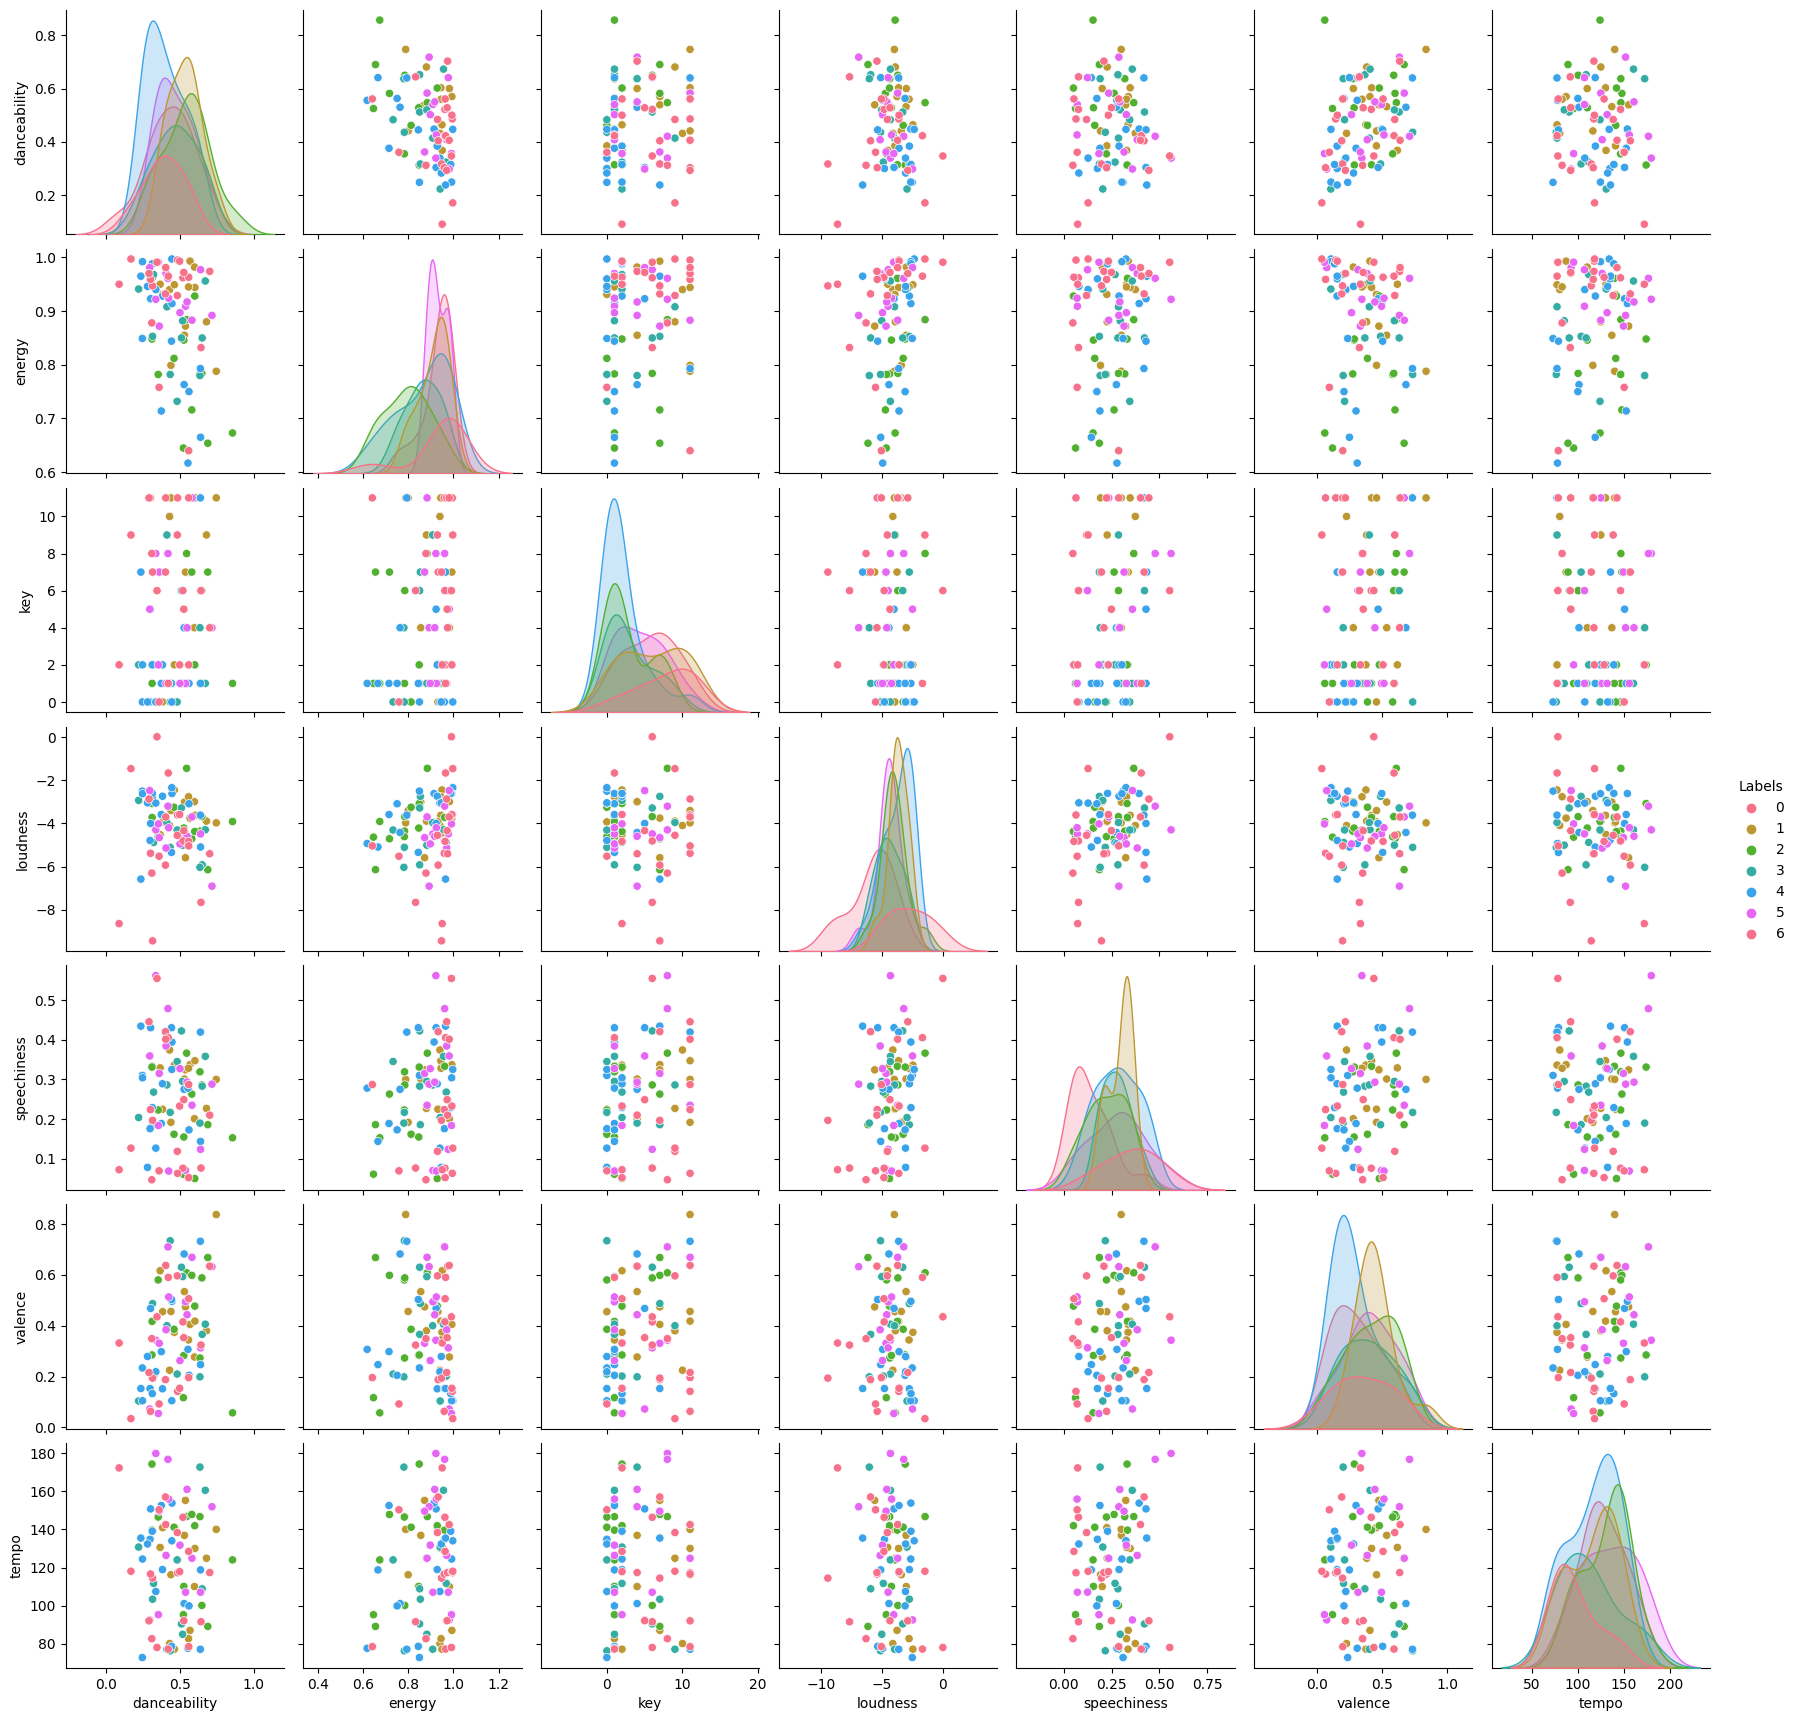

In [129]:
sns.pairplot(df,hue='Labels',palette="husl")

In [130]:
df.corr()

,danceability,energy,key,loudness,speechiness,valence,tempo,Labels
danceability,1.000000,-0.413346,0.089460,-0.126611,-0.087210,0.367508,-0.084634,-0.132480
energy,-0.413346,1.000000,0.095021,0.209432,0.160836,-0.124762,0.114417,0.128588
key,0.089460,0.095021,1.000000,-0.021393,0.202502,0.202092,-0.068086,-0.120359
loudness,-0.126611,0.209432,-0.021393,1.000000,0.294151,-0.020491,-0.148849,-0.442224
speechiness,-0.087210,0.160836,0.202502,0.294151,1.000000,0.206080,-0.007475,-0.299683
valence,0.367508,-0.124762,0.202092,-0.020491,0.206080,1.000000,0.028715,-0.155639
tempo,-0.084634,0.114417,-0.068086,-0.148849,-0.007475,0.028715,1.000000,0.220975
Labels,-0.132480,0.128588,-0.120359,-0.442224,-0.299683,-0.155639,0.220975,1.000000


In [135]:
df.loc[df['Labels'] == 1].corrwith(df.loc[df['Labels'] == 2])


danceability   NaN
energy         NaN
key            NaN
loudness       NaN
speechiness    NaN
valence        NaN
tempo          NaN
Labels         NaN
dtype: float64

In [132]:
all_df = [ms_df, dw_df, gp_df, pb_df, bp_df, ys_df]
i = 0
for d in all_df:
    cors = []
    j = 0
    for dd in all_df:
        print(str(i) +  " corrwith " + str(j))
        print(d.corrwith(dd))
        j = j + 1
        print('\n')
    i = i + 1

0 corrwith 0
danceability    1.0
energy          1.0
key             1.0
loudness        1.0
speechiness     1.0
valence         1.0
tempo           1.0
Labels          NaN
dtype: float64


0 corrwith 1
danceability   NaN
energy         NaN
key            NaN
loudness       NaN
speechiness    NaN
valence        NaN
tempo          NaN
Labels         NaN
dtype: float64


0 corrwith 2
danceability   NaN
energy         NaN
key            NaN
loudness       NaN
speechiness    NaN
valence        NaN
tempo          NaN
Labels         NaN
dtype: float64


0 corrwith 3
danceability   NaN
energy         NaN
key            NaN
loudness       NaN
speechiness    NaN
valence        NaN
tempo          NaN
Labels         NaN
dtype: float64


0 corrwith 4
danceability   NaN
energy         NaN
key            NaN
loudness       NaN
speechiness    NaN
valence        NaN
tempo          NaN
Labels         NaN
dtype: float64


0 corrwith 5
danceability   NaN
energy         NaN
key            NaN
loudness    

<Axes: ylabel='Labels-None'>

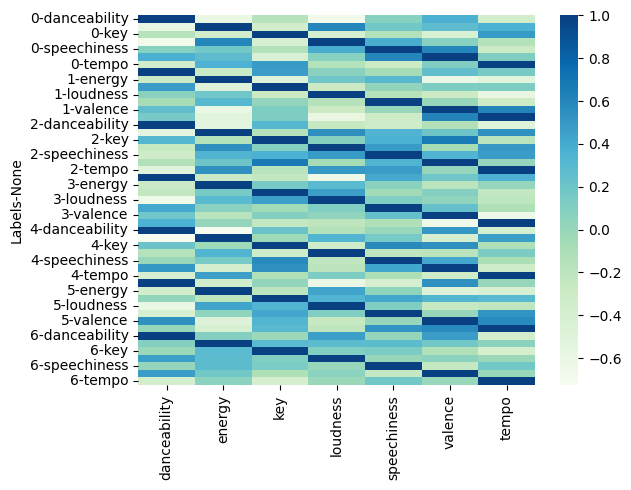

In [133]:
sns.heatmap(df.groupby('Labels').corr(),cmap="GnBu")

In [134]:
print(df.columns)
yescols = ['danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'valence', 'tempo', 'duration_ms']
sns.heatmap(df.groupby('Labels')[yescols].corr(),cmap="GnBu")

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness', 'valence',
       'tempo', 'Labels'],
      dtype='object')


KeyError: "Columns not found: 'acousticness', 'instrumentalness', 'duration_ms'"